# CallArgs BEGINNER

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones) BEGINNER.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'callarg__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('callargs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-27 12:43:16.802624 Data cache files found ...
2024-05-27 12:43:17.074502 Data cache files successfully loaded!!
The dataset contains 331228 (39.75%) instances for BEGINNER class and 501962 (60.25%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (331228, 3)
As we can see the downloaded data contains a total of 331228 instances. Each of the instances corresponds to a program. For each program we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 331228 entries, 0 to 331227
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           331228 non-null  int64  
 1   callarg__named_args_pct        331228 non-null  float64
 2   callarg__double_star_args_pct  331228 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 10.1 MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.97%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
dtype: int64

In [6]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,331228.0,1.276103,1.054314,0.0,1.0,1.0,2.0,49.0
callarg__named_args_pct,331228.0,0.038643,0.171408,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,331228.0,0.000011,0.002230,0.0,0.0,0.0,0.0,0.5


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 188930   57.039260
           [2.0_inf]  91859   27.732861
           [0.0_1.0)  50439   15.227879

callarg__named_args_pct  count  percentage
              [0.0_0.0] 312983    94.49171
              [0.0_inf]  18245     5.50829

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 331218   99.996981
                    [0.0_inf]     10    0.003019

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (331228, 3)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

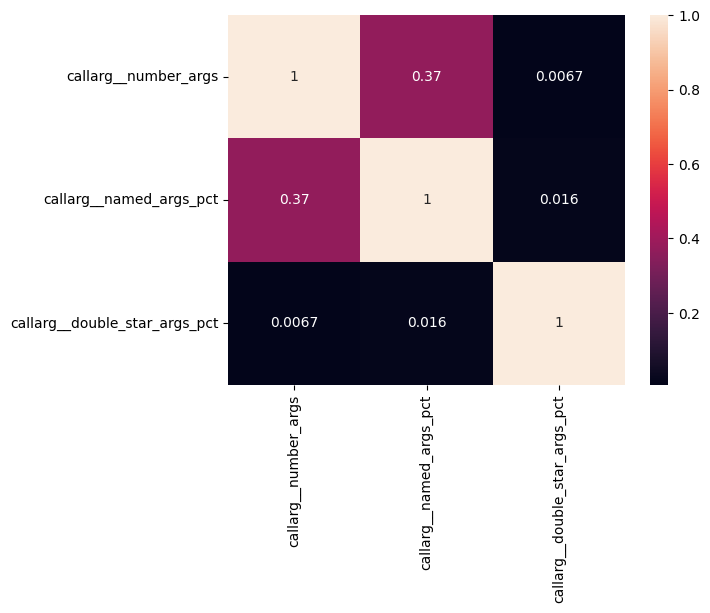

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 3 variable (1 numerica y 2 porcentuales) se hara un analisis detallado 

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 96. Con una media de 1.316.

<Axes: ylabel='callarg__number_args'>

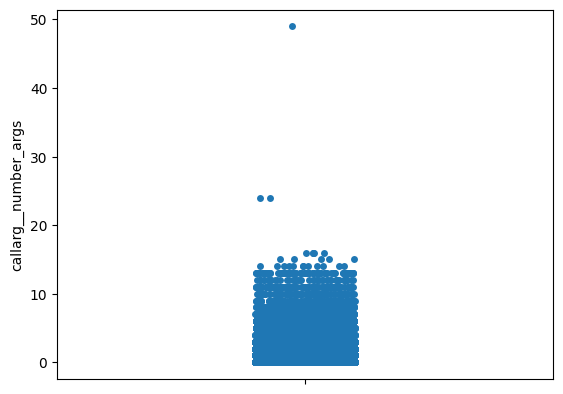

In [11]:
sns.stripplot(X['callarg__number_args'])

In [12]:
print_outliers_for_df_column(X, 'callarg__number_args')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8589566955117763
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9257920006139997,48.58561908395905]
-3.0IQR: 0 instancias tienen un valor para callarg__number_args inferior a -2.0 (Q1-3*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__number_args inferior a -0.5 (Q1-1.5*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
+1.5IQR: 10283 instancias tienen un valor para callarg__number_args superior a 3.5 (Q3+1.5*IQR) para callarg__number_args. Representando un 3.105% del total de instancias.
+3.0IQR: 2760 instancias tienen un valor para callarg__number_args superior a 5.0 (Q3-3*IQR) para callarg__number_args. Representando un 0.8333% del total de instancias.
L: 50439 instancias tienen un valor para callarg__number_arg

In [13]:
X[X['callarg__number_args'] > 59].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.095.

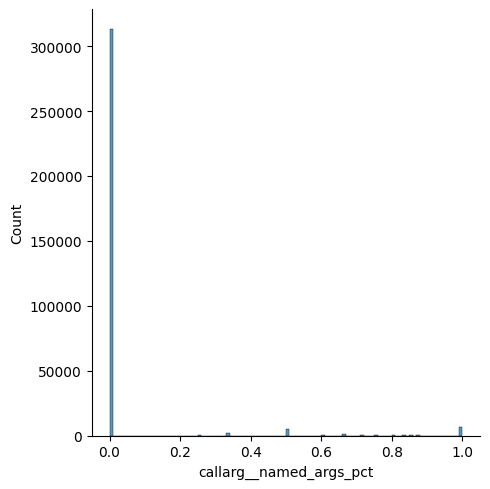

In [14]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [15]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8679548932611634
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 18245 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__named_args_pct. Representando un 5.508% del total de instancias.
+3.0IQR: 18245 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3-3*IQR) para callarg__named_args_pct. Representando un 5.508% del total de instancias.
L: 0 instancias tienen un valor para callarg__named_args_pct inferior

In [16]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,18245.000000,18245.000000,18245.000000
mean,2.999671,0.701550,0.000206
std,1.833511,0.261402,0.009501
min,1.000000,0.020408,0.000000
25%,2.000000,0.500000,0.000000
50%,2.000000,0.666667,0.000000
75%,4.000000,1.000000,0.000000
max,49.000000,1.000000,0.500000


### Variable double_star_args_pct (3/3)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0. La media es 0.000434.

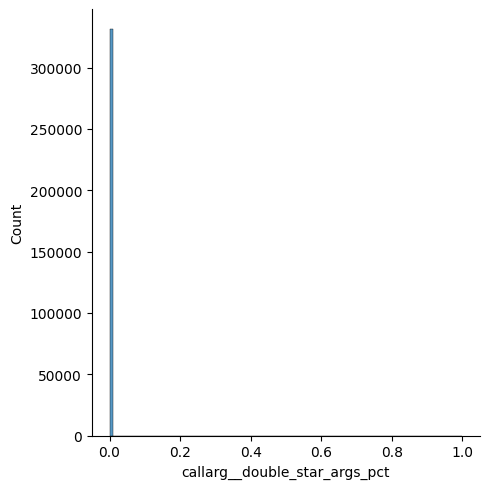

In [17]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [18]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9974393376066553
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 10 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__double_star_args_pct. Representando un 0.003019% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3-3*IQR) para callarg__double_star_args_pct. Representando un 0.003019% del total de instancias.
L: 0 instancias tiene

In [19]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,10.000000,10.000000,10.000000
mean,3.300000,0.623333,0.376667
std,1.702939,0.159513,0.159513
min,2.000000,0.500000,0.166667
25%,2.000000,0.500000,0.200000
50%,2.000000,0.500000,0.500000
75%,5.000000,0.800000,0.500000
max,6.000000,0.833333,0.500000
